<a href="https://colab.research.google.com/github/KunalShm/py/blob/master/Asg_Elucidata_911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
downloaded = drive.CreateFile({'id':"1ZHfYVhzYXC25tJD-_OKGx6gKBHKmytBI"})
downloaded.GetContentFile('PAAD.gct') 

In [3]:
!pip install cmapPy

     |████████████████████████████████| 153kB 2.8MB/s 


In [0]:
import cmapPy as cp
from cmapPy.pandasGEXpress.parse_gct import parse
from cmapPy.pandasGEXpress.write_gct import write
data = parse('PAAD.gct')


In [5]:
data.data_df.shape

(18465, 183)

In [6]:
all_missing = data.data_df.isna().sum()
miss_sum =0
for i in range(0,183):
  miss_sum = miss_sum + all_missing[i]

miss_sum

134954

In [7]:
df = data.data_df
df.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,7.5,7.55,7.8,8.15,8.7,8.0,6.5,6.55,8.1,7.3,7.95,7.3,8.35,6.4,8.25,8.55,7.5,7.65,7.45,8.1,8.7,8.0,7.5,9.95,8.7,8.05,7.65,7.65,7.85,8.05,...,8.8,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.65,7.45,7.7,7.85,7.7,7.4,8.5,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.5,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,6.8,5.90,5.7,6.70,5.4,5.8,6.7,6.00,7.0,5.7,6.50,7.8,10.00,7.3,6.10,7.20,6.5,7.10,6.50,9.3,9.5,9.7,8.6,8.00,8.5,6.20,9.00,6.70,5.30,5.10,...,6.8,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.00,6.30,6.7,5.20,8.1,7.2,8.1,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.9,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,6.9,4.60,NaN,6.20,4.5,3.1,5.7,5.30,1.2,4.7,4.20,5.2,5.60,7.5,7.40,5.20,5.6,1.30,2.10,6.9,7.2,6.6,8.3,7.00,8.5,3.10,8.20,5.20,2.70,2.20,...,4.5,5.90,2.9,3.10,6.9,6.9,4.6,6.5,-1.2,0.90,7.00,6.0,4.20,5.4,5.3,1.1,6.20,5.80,6.7,4.9,7.2,4.4,6.40,4.8,7.00,6.4,6.0,5.30,5.60,5.4,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,1.6,0.70,-0.9,0.30,1.3,NaN,NaN,NaN,-0.1,1.3,NaN,NaN,NaN,0.3,1.10,1.50,NaN,1.00,-0.40,3.6,NaN,-0.8,-1.0,NaN,NaN,0.40,NaN,-1.30,NaN,NaN,...,NaN,0.40,-0.1,-1.00,3.7,1.8,-0.3,1.5,-1.2,NaN,0.00,-0.1,NaN,NaN,NaN,NaN,-0.50,-0.70,-1.2,0.1,0.7,-1.0,-0.90,NaN,6.60,0.6,0.4,-1.10,-0.70,1.0,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,7.1,7.70,6.4,6.50,6.9,6.0,8.2,8.40,6.4,7.1,6.40,8.1,6.60,7.7,7.10,7.50,6.0,6.50,7.30,6.3,6.7,5.5,6.4,5.50,3.8,6.60,4.40,7.00,6.80,6.80,...,6.6,6.80,6.8,6.70,6.7,6.2,6.8,7.2,5.3,7.30,8.20,7.7,6.60,8.0,7.5,6.9,6.40,7.00,6.7,7.3,7.5,6.8,7.00,7.1,6.70,7.4,7.1,7.40,6.80,6.1,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


In [8]:
df1=df
df1.shape

(18465, 183)

In [9]:
df1=df1.dropna()
df1.shape

(14098, 183)

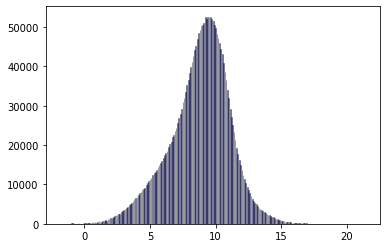

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df1[:], hist=True, kde=False, 
             bins=500, color = 'blue',
             hist_kws={'edgecolor':'black'})

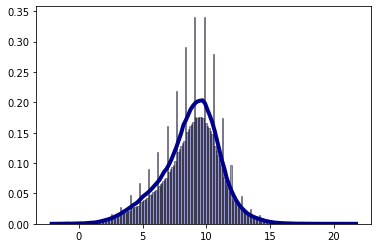

In [11]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df1[:], hist=True, kde=True, 
             bins=200, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

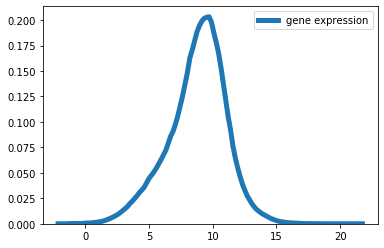

In [12]:
sns.distplot(df1[:], hist = False, kde = True,
                 kde_kws = {'linewidth': 5},
                 label = "gene expression")

In [14]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_initialized',
 'assemble_multi_index_df',
 'check_df',
 'col_metadata_df',
 'data_df',
 'id_match_check',
 'logger',
 'multi_index_df',
 'row_metadata_df',
 'src',
 'version']

In [16]:
data.col_metadata_df.shape

(183, 124)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_data = scaler.transform(df1)

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)
print(pca.explained_variance_)

(14098, 183)
(14098, 2)
[159.28098   3.83985]


In [66]:
target = (data.col_metadata_df.adenocarcinoma_invasion).eq('yes').mul(1)
target.unique()

array([1, 0])

Text(0, 0.5, 'Second Principal Component')

<Figure size 576x432 with 0 Axes>

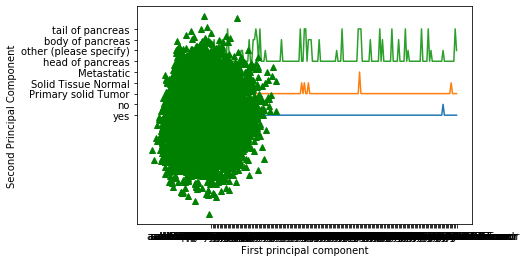

In [92]:
plt.figure(figsize=(8,6))
f, ax = plt.subplots(1)
ax.plot(data.col_metadata_df.adenocarcinoma_invasion)
ax.plot(data.col_metadata_df.sample_type)
ax.plot(data.col_metadata_df.anatomic_neoplasm_subdivision)
ax.plot(x_pca[:,0],x_pca[:,1],'g^')
#ax.plot(data.col_metadata_df.histological_type_other)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


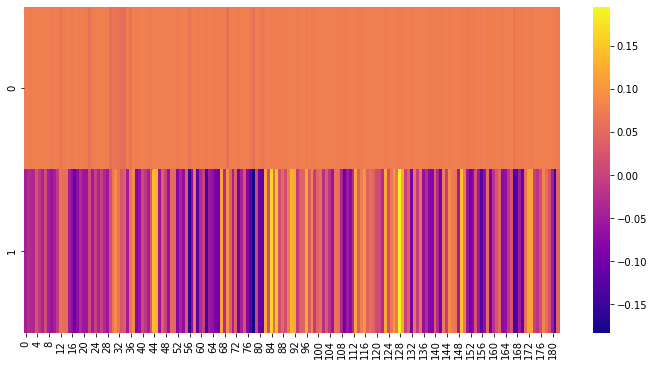

In [85]:
import pandas as pd
df_comp = pd.DataFrame(pca.components_)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [76]:
data.col_metadata_df.histological_type_other

cid
aab1-Primary solid Tumor          invasive adenocarcinoma
aab4-Primary solid Tumor    invasive, well-differentiated
aab6-Primary solid Tumor                              NaN
aab8-Primary solid Tumor                              NaN
aab9-Primary solid Tumor                              NaN
                                        ...              
a89d-Solid Tissue Normal                              NaN
a89d-Primary solid Tumor                              NaN
a8sy-Primary solid Tumor                              NaN
a8lh-Primary solid Tumor                              NaN
aapl-Primary solid Tumor                              NaN
Name: histological_type_other, Length: 183, dtype: object

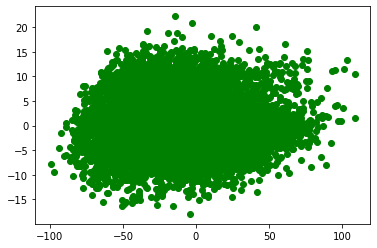

In [105]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c='green')

In [94]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    

1 component: 87.03% of initial variance
2 component: 2.1% of initial variance


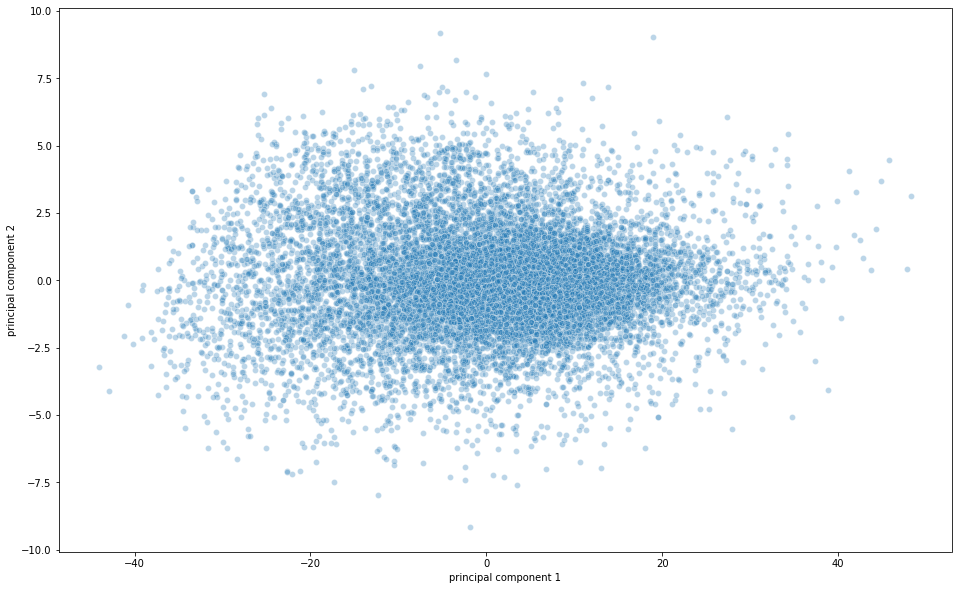

In [110]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    palette=sns.color_palette("hls", 10),
    data=x1_pca,
    legend="full",
    alpha=0.3
)